In [1]:
import sqlite3
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
# charger BDD
DB_PATH = "tripadvisor.db"

In [3]:
with sqlite3.connect(DB_PATH) as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    print("Tables dans la base de données :", tables)

Tables dans la base de données : [('COUNTRY',), ('CITY',), ('POSTAL_CODE',), ('RESTAURANT',), ('PHOTOS',), ('REVIEWS',)]


In [4]:
with sqlite3.connect(DB_PATH) as conn:
    query = "SELECT * FROM reviews"
    data = pd.read_sql_query(query, conn)

In [5]:
data

,ID_REVIEW,ID_RESTAURANT,N_CONTRIB,REVIEW_TITLE,REVIEW_BODY,REVIEW_SCORE,REVIEW_DAY,REVIEW_MONTH,REVIEW_YEAR,VISIT_MONTH,VISIT_YEAR,VISIT_CONTEXT
0,1,1,1,Super tout,"Super service, super entrée, super plat et sup...",5.0,21,décembre,2024,déc.,2024,couples
1,2,1,1,Excellente découverte,Un menu découverte fantastique avec des produi...,5.0,3,décembre,2024,déc.,2024,couples
2,3,1,45,Une belle découverte,L'accueil était chaleureux et le service impec...,4.0,1,décembre,2024,nov.,2024,couples
3,4,1,2,Temps de partage et de convivialité très agréable,Nous avons apprécié la qualité du dîner : prod...,4.0,30,novembre,2024,nov.,2024,friends
4,5,1,893,Plat aboutis et savoureux,Une très bon moment entre amis!\n\nLes plats s...,5.0,16,novembre,2024,nov.,2024,friends
...,...,...,...,...,...,...,...,...,...,...,...,...
20405,20406,33,232,Miam,Super option végétarienne dans centre de Lyon....,5.0,20,février,2016,févr.,2016,none
20406,20407,33,3,Délicieux,L'endroit est petit mais agréable et propre et...,5.0,1,janvier,2016,déc.,2015,couples
20407,20408,33,7,Surévalué,Le goût est assez ennuyeux. Le pain n'est pas ...,2.0,26,octobre,2015,août,2015,friends
20408,20409,33,40,Excellent falafel à Lyon,"Dans le centre-ville, c'est un très bon endroi...",5.0,20,octobre,2015,août,2015,friends


In [20]:
with sqlite3.connect(DB_PATH) as conn:
    query = "SELECT * FROM restaurant"
    data_restau = pd.read_sql_query(query, conn)

In [21]:
data_restau

,ID_RESTAURANT,SOURCE_PAGE,RESTAURANT_NAME,CLAIMED,PRICE_RANGE,ADDRESS,POSTAL_CODE,CITY,COUNTRY,PHONE_NUMBER,OPENING_HOURS,TRAVELERS_CHOICE,DETAILED_RATING,DETAILS,REVIEW_NUMBER,OVERALL_RATING,RANKING
0,1,https://www.tripadvisor.fr/Restaurant_Review-g...,Aromatic Restaurant,b'\x01',Française,15 Rue du Chariot d'Or,1,1,1,+33 4 78 23 73 61,"[""Dimanche"", ""Fermé "", ""Lundi"", ""Fermé "", ""Mar...",2024,"{""Excellent"": 934, ""Horrible"": 5, ""Moyen"": 41,...","{""CUISINES"": ""[\""Française, \"", \""Européenne\""...",b'^\x04\x00\x00\x00\x00\x00\x00',5.0,"{""over"": 3178, ""rank"": 49}"
1,2,https://www.tripadvisor.fr/Restaurant_Review-g...,Au 14 Fevrier Vieux Lyon,b'\x01',€€€€,36 rue du Bœuf,1,1,1,+33 4 78 92 91 39,"["""", ""Cuisine"", ""4,8 sur 5 bulles"", """", ""Servi...",,"{""Excellent"": 466, ""Horrible"": 6, ""Moyen"": 28,...","{""CUISINES"": ""[\""Française, \"", \""Européenne\""...",b'Q\x02\x00\x00\x00\x00\x00\x00',4.5,"{""over"": 3178, ""rank"": 40}"
2,3,https://www.tripadvisor.fr/Restaurant_Review-g...,BLO Restaurant,b'\x01',Française,37 Rue de la Charite,1,1,1,+33 4 72 31 76 95,"[""Dimanche"", ""Fermé "", ""Lundi"", ""12:00-14:0019...",2024,"{""Excellent"": 241, ""Horrible"": 4, ""Moyen"": 15,...","{""CUISINES"": ""[\""Française, \"", \""Steakhouse, ...","b',\x01\x00\x00\x00\x00\x00\x00'",4.5,"{""over"": 3178, ""rank"": 65}"
3,4,https://www.tripadvisor.fr/Restaurant_Review-g...,Buvette des Cygnes,b'\x00',€,Parc de la Tete D Or,1,1,1,+33 4 78 89 11 27,"["""", ""Cuisine"", ""2,9 sur 5 bulles"", """", ""Servi...",,"{""Excellent"": 124, ""Horrible"": 153, ""Moyen"": 2...","{""CUISINES"": ""[\""Française\""]"", ""FONCTIONNALIT...",b'\x8d\x01\x00\x00\x00\x00\x00\x00',3.0,"{""over"": 3178, ""rank"": 2}"
4,5,https://www.tripadvisor.fr/Restaurant_Review-g...,Empanadas Club,b'\x01',Latino,4 Rue Pizay Près De La Place Des Terreaux,1,1,1,+33 4 83 43 27 23,"[""Dimanche"", ""12:00-15:0019:00-23:00"", ""Lundi""...",2024,"{""Excellent"": 383, ""Horrible"": 1, ""Moyen"": 4, ...","{""CUISINES"": ""[\""Latino, \"", \""Saine, \"", \""Ar...",b'\xa2\x01\x00\x00\x00\x00\x00\x00',5.0,"{""over"": 3178, ""rank"": 6}"
5,6,https://www.tripadvisor.fr/Restaurant_Review-g...,Flair,b'\x01',Française,84 rue de la Charite,3,1,1,+33 4 72 56 06 31,"[""Dimanche"", ""Fermé "", ""Lundi"", ""Fermé "", ""Mar...",,"{""Excellent"": 727, ""Horrible"": 4, ""Moyen"": 57,...","{""CUISINES"": ""[\""Française, \"", \""Internationa...",b'\xe1\x03\x00\x00\x00\x00\x00\x00',4.5,"{""over"": 3178, ""rank"": 51}"
6,7,https://www.tripadvisor.fr/Restaurant_Review-g...,Kaffee Berlin Sans-Souci,b'\x01',€,26 Cours Albert Thomas,1,1,1,+33 6 18 81 37 13,"["""", ""Cuisine"", ""4,0 sur 5 bulles"", """", ""Servi...",,"{""Excellent"": 138, ""Horrible"": 29, ""Moyen"": 36...","{""CUISINES"": ""[\""Américaine, \"", \""Allemande, ...",b'y\x01\x00\x00\x00\x00\x00\x00',4.0,"{""over"": 3178, ""rank"": 425}"
7,8,https://www.tripadvisor.fr/Restaurant_Review-g...,L'Alexandrin,b'\x01',€€€€,83 Rue Moncey,1,1,1,+33 4 72 61 15 69,"["""", ""Cuisine"", ""4,6 sur 5 bulles"", """", ""Servi...",,"{""Excellent"": 579, ""Horrible"": 16, ""Moyen"": 47...","{""CUISINES"": ""[\""Française, \"", \""Européenne\""...",b'\xf7\x02\x00\x00\x00\x00\x00\x00',4.5,"{""over"": 3178, ""rank"": 12}"
8,9,https://www.tripadvisor.fr/Restaurant_Review-g...,L'Argot,b'\x01',Française,132 Rue Bugeaud,4,1,1,+33 4 78 24 57 88,"[""Dimanche"", ""Fermé "", ""Lundi"", ""Fermé "", ""Mar...",2024,"{""Excellent"": 594, ""Horrible"": 10, ""Moyen"": 22...","{""CUISINES"": ""[\""Française, \"", \""Européenne, ...",b'\x15\x03\x00\x00\x00\x00\x00\x00',4.5,"{""over"": 3178, ""rank"": 67}"
9,10,https://www.tripadvisor.fr/Restaurant_Review-g...,L'Atelier des Augustins,b'\x01',€€€€,17 Rue Hippolyte Flandrin,5,1,1,+33 4 72 00 88 01,"["""", ""Cuisine"", ""4,7 sur 5 bulles"", """", ""Servi...",,"{""Excellent"": 649, ""Horrible"": 8, ""Moyen"": 45,...","{""CUISINES"": ""[\""Française, \"", \""Européenne, ...",b'B\x03\x00\x00\x00\x00\x00\x00',4.5,

## Analyse intra-restaurant

### Analyse reviews

In [6]:
# Distribution des notes
def get_review_distribution(cursor, restaurant_id):

    query = """
        SELECT REVIEW_SCORE, COUNT(*) AS count
        FROM reviews
        WHERE ID_RESTAURANT = ?
        GROUP BY REVIEW_SCORE
        ORDER BY REVIEW_SCORE
        """
        
    cursor.execute(query, (restaurant_id,))
    rows = cursor.fetchall()
        
    review_distribution = {row[0]: row[1] for row in rows}
        
    return review_distribution


In [7]:
# Test
restaurant_id = 1
distribution = get_review_distribution(cursor, restaurant_id)

print(distribution)

{1.0: 3, 2.0: 3, 3.0: 34, 4.0: 121, 5.0: 863}


In [8]:
# Histogramme distribution notes
def plot_review_distribution(review_distribution):

    try:
        if not review_distribution:
            print("Aucune donnée disponible pour afficher la répartition.")
            return
        
        scores = list(review_distribution.keys())
        counts = list(review_distribution.values())
        
        sns.set_theme(style="whitegrid")

        plt.figure(figsize=(10, 6))
        
        bars = plt.bar(scores, counts, color='lightblue', linewidth=1.2, width=0.5)
        
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.2, f'{int(height)}', 
                     ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        plt.title("Répartition des notes des avis", fontsize=16, fontweight='bold', color='darkslategray')
        plt.xlabel("Scores", fontsize=14, labelpad=10, color='gray')
        plt.ylabel("Nombre d'occurrences", fontsize=14, labelpad=10, color='gray')
        
        plt.xticks(scores, fontsize=12, color='black')
        plt.yticks(fontsize=12, color='black')
        plt.ylim(0, max(counts) + 2) 
        
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Erreur lors de l'affichage de l'histogramme : {e}")


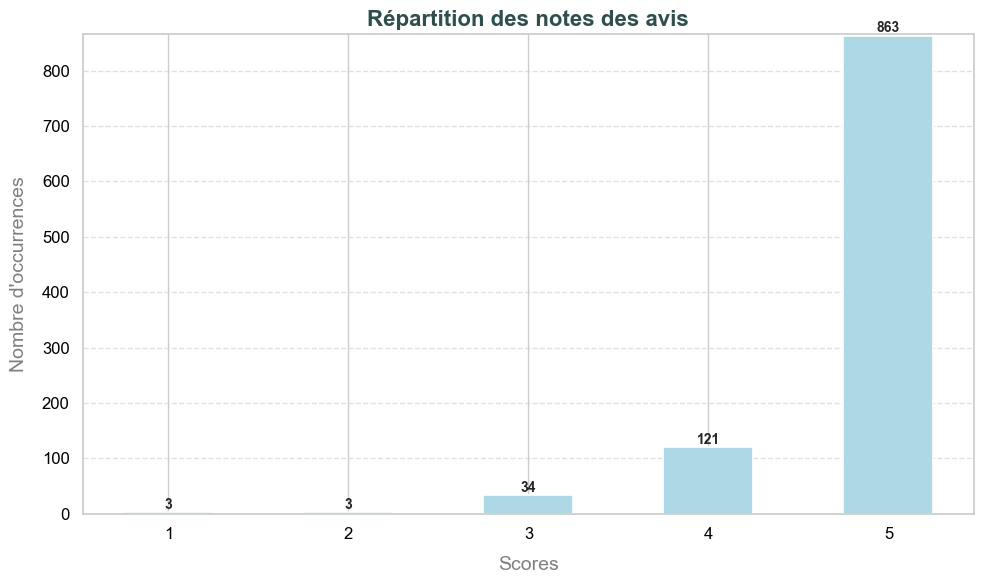

In [9]:
# Test
plot_review_distribution(distribution)

In [10]:
# tendance avis par année
def get_review_trends_by_year(restaurant_id):
    query = """
        SELECT 
            REVIEW_YEAR, 
            AVG(REVIEW_SCORE) AS avg_score, 
            COUNT(*) AS review_count
        FROM reviews
        WHERE ID_RESTAURANT = ?
        GROUP BY REVIEW_YEAR
        ORDER BY REVIEW_YEAR ASC;
    """
    cursor.execute(query, (restaurant_id,))
    results = cursor.fetchall()

    trends = []
    for row in results:
        trends.append({
            "year": row[0],
            "average_score": row[1],
            "review_count": row[2]
        })

    return trends


In [11]:
get_review_trends_by_year(restaurant_id)

[{'year': '!', 'average_score': 5.0, 'review_count': 5},
 {'year': '2017', 'average_score': 4.883161512027492, 'review_count': 291},
 {'year': '2018', 'average_score': 4.745173745173745, 'review_count': 259},
 {'year': '2020', 'average_score': 4.666666666666667, 'review_count': 3},
 {'year': '2021', 'average_score': 4.6923076923076925, 'review_count': 26},
 {'year': '2022', 'average_score': 4.8478260869565215, 'review_count': 46},
 {'year': '2023', 'average_score': 4.733333333333333, 'review_count': 75},
 {'year': '2024', 'average_score': 4.688524590163935, 'review_count': 61},
 {'year': '27', 'average_score': 5.0, 'review_count': 1},
 {'year': '31', 'average_score': 5.0, 'review_count': 3},
 {'year': 'A', 'average_score': 5.0, 'review_count': 1},
 {'year': 'Aromatic', 'average_score': 5.0, 'review_count': 1},
 {'year': 'Attention,', 'average_score': 4.0, 'review_count': 1},
 {'year': 'Au', 'average_score': 5.0, 'review_count': 3},
 {'year': "C'est", 'average_score': 5.0, 'review_count

In [12]:
# analyse de sentiments des commentaires (positifs, négatifs, neutres).
def analyze_review_sentiments(restaurant_id):
    return

In [13]:
# mots ou expressions les plus fréquents dans les avis.
def get_common_review_keywords(restaurant_id, top_n=10):
    return

def get_review_word_cloud(restaurant_id):
    return

## Analyse caractéristiques restaurants

In [14]:
# Affiche les horaires d'ouverture
def get_opening_hours(restaurant_id):
    return

In [15]:
# prix du restaurant
def get_price_range(restaurant_id):
    return

### Analyse statistiques

In [16]:
# note moyenne du restaurant
def get_average_rating(restaurant_id):
    return

In [17]:
# nombre total d'avis
def get_number_of_reviews(restaurant_id):
    return

### Analyse temporelle

In [18]:
# périodes où le restaurant reçoit le plus d'avis
def get_peak_review_dates(restaurant_id):
    return

In [19]:
# tendances des avis selon les jours de la semaine
def get_review_patterns_by_day_of_week(restaurant_id):
    return

## Analyse inter-restaurant

In [1]:
import sqlite3
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Connexion à la base de données SQLite
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

# Ajouter les colonnes latitude et longitude dans la table restaurant
cursor.execute("ALTER TABLE restaurant ADD COLUMN latitude REAL")
cursor.execute("ALTER TABLE restaurant ADD COLUMN longitude REAL")

# Initialiser le géocodeur
geolocator = Nominatim(user_agent="restaurant_geocoder")

# Fonction pour obtenir les coordonnées géographiques
def get_coordinates(address):
    try:
        location = geolocator.geocode(address, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

# Récupérer les adresses des restaurants
cursor.execute("SELECT ID_RESTAURANT, ADDRESS, POSTAL_CODE, CITY FROM restaurant")
restaurants = cursor.fetchall()

# Mettre à jour les coordonnées pour chaque restaurant
for restaurant in restaurants:
    id_restaurant, address, postal_code, city = restaurant
    full_address = f"{address}, {postal_code}, {city}"
    latitude, longitude = get_coordinates(full_address)

    # Mettre à jour les colonnes latitude et longitude dans la base de données
    cursor.execute("""
        UPDATE restaurant
        SET latitude = ?, longitude = ?
        WHERE ID_RESTAURANT = ?
    """, (latitude, longitude, id_restaurant))

    print(f"Restaurant ID {id_restaurant}: Latitude={latitude}, Longitude={longitude}")

# Enregistrer les changements et fermer la connexion
conn.commit()
conn.close()


NameError: name 'DB_PATH' is not defined